# WSDM - Fake News Classification

### 訓練資料集（Training Set）約有 32 萬筆數據、測試資料集（Test Set）則約為 8 萬筆

In [1]:
from ckiptagger import data_utils, construct_dictionary, WS

In [2]:
# import os
import jieba.posseg as pseg
import pandas as pd
from opencc import OpenCC

TRAIN_CSV_PATH = 'C:/Users/Robbie/Documents/bigdata/Final/train.csv'
train = pd.read_csv(TRAIN_CSV_PATH, index_col=0)

train

,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
id,,,,,,,
0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated
2,2,5,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP topped Hong Kong last year? She...,unrelated
9,6,7,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,"""How to discriminate oil from gutter oil by me...",It took 30 years of cooking oil to know that o...,agreed
...,...,...,...,...,...,...,...
321185,167562,114783,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,西媒曝萨拉赫被推荐至巴萨 经纪人辟谣：并未发生,egypt 's presidential election failed to win m...,West Media Exposing Tallahlach has been recomm...,unrelated
321182,167562,114782,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,萨拉赫经纪人辟谣：与巴萨传闻不实,egypt 's presidential election failed to win m...,Salah agent's dishonest rumour: rumour with ba...,unrelated
321184,167562,137705,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,萨拉赫辟谣传闻：埃及非常团结，我们之间没有任何分歧,egypt 's presidential election failed to win m...,Rumor has it that Egypt is very united and the...,unrelated


## 抓取中文資料作分析 

In [ ]:

cols = ['title1_zh','title2_zh', 'label']
train = train.loc[:, cols]
train.dropna(inplace = True)

## 將原本的'簡體'轉為'繁體'

In [ ]:
cc = OpenCC('s2t')

# 逐筆逐筆轉繁體
reviews_tw = []
reviews_tw2 = []
for text in train.title1_zh:
    reviews_tw.append(cc.convert(text))
for text in train.title2_zh:
    reviews_tw2.append(cc.convert(text))

train['title1_zh']=reviews_tw
train['title2_zh']=reviews_tw2


# 資料前處理 

原文章使用的斷詞方式為"Jieba"，但因處理時間過長(完整處理需8小時)，因此改成課堂使用的"中研院ckiplab word segmentation"，時間縮短為4分16秒!

In [2]:
# def jieba_tokenizer(text): 
#     words = pseg.cut(text)
#     return ' '.join([
#         word for word, flag in words if flag != 'x'])

# %%time
# train['title1_tokenized'] = \
#     train.loc[:, 'title1_zh'] \
#          .apply(jieba_tokenizer)
# train['title2_tokenized'] = \
#     train.loc[:, 'title2_zh'] \
#          .apply(jieba_tokenizer)

##  中研院ckiplab word segmentation

In [3]:
%%time
from ckiptagger import data_utils, construct_dictionary, WS
# location of models
model_path = 'C:/Users/Robbie/Documents/bigdata/model/data'
# It takes a moment to load models
#  
ws = WS(model_path)

tokens = ws(train.title1_zh)
tokens2 = ws(train.title2_zh)


Wall time: 4min 16s


In [4]:
import re

In [5]:
pattern = re.compile(r'[\u4e00-\u9fa5]+')
doc=['(', '⊙o⊙', ')','','好吃',',', '味道', '足','。','2']
[x for x in doc if pattern.match(x)]
tokens_str=[]
drops=[]
for idx,line in enumerate(tokens):
    # 刪除不屬於中文字的特殊字元 包含標點符號等
    line_list = [x for x in line if pattern.match(x)]
    line_str = " ".join(line_list) # 合併成字串 以空格分隔
    # 過濾之後，有些留言可能會變成空值 需要進一步刪除該筆
    if len(line_str)==0:
        print(idx, ':skip a blank line跳開這筆空白內容')
        drops.append(idx)
        continue
    tokens_str.append(line_str)  
# drop blank samples去除空白的row
train = train.drop(train.index[ drops ])

In [6]:
pattern = re.compile(r'[\u4e00-\u9fa5]+')
doc=['(', '⊙o⊙', ')','','好吃',',', '味道', '足','。','2']
[x for x in doc if pattern.match(x)]
tokens_str2=[]
drops=[]
for idx,line in enumerate(tokens2):
    # 刪除不屬於中文字的特殊字元 包含標點符號等
    line_list = [x for x in line if pattern.match(x)]
    line_str = " ".join(line_list) # 合併成字串 以空格分隔
    # 過濾之後，有些留言可能會變成空值 需要進一步刪除該筆
    if len(line_str)==0:
        print(idx, ':skip a blank line跳開這筆空白內容')
        continue
    tokens_str2.append(line_str)  
# # drop blank samples去除空白的row
# train = train.drop(train.index[ drops ])

1340 :skip a blank line跳開這筆空白內容
227349 :skip a blank line跳開這筆空白內容
290503 :skip a blank line跳開這筆空白內容


In [7]:
train

,title1_zh,title2_zh,label
id,,,
0,2017養老保險又新增兩項，農村老人人人可申領，你領到了嗎,警方闢謠“鳥巢大會每人領5萬” 仍有老人堅持進京,unrelated
3,"""你不來深圳，早晚你兒子也要來""，不出10年深圳人均GDP將超香港",深圳GDP首超香港？深圳統計局闢謠：只是差距在縮小,unrelated
1,"""你不來深圳，早晚你兒子也要來""，不出10年深圳人均GDP將超香港",GDP首超香港？深圳澄清：還差一點點……,unrelated
2,"""你不來深圳，早晚你兒子也要來""，不出10年深圳人均GDP將超香港",去年深圳GDP首超香港？深圳統計局闢謠：還差611億,unrelated
9,"""用大蒜鑑別地溝油的方法,怎麼鑑別地溝油",吃了30年食用油才知道，一片大蒜輕鬆鑑別地溝油,agreed
...,...,...,...
321185,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,西媒曝薩拉赫被推薦至巴薩 經紀人闢謠：並未發生,unrelated
321182,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,薩拉赫經紀人闢謠：與巴薩傳聞不實,unrelated
321184,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,薩拉赫闢謠傳聞：埃及非常團結，我們之間沒有任何分歧,unrelated


In [8]:
train['title1_tokenized'] = tokens_str
train.drop(train.index[1340], inplace = True)
train.drop(train.index[227349], inplace = True)
train.drop(train.index[290503], inplace = True)
train['title2_tokenized'] = tokens_str2

## 斷詞顯示結果 

In [9]:
train

,title1_zh,title2_zh,label,title1_tokenized,title2_tokenized
id,,,,,
0,2017養老保險又新增兩項，農村老人人人可申領，你領到了嗎,警方闢謠“鳥巢大會每人領5萬” 仍有老人堅持進京,unrelated,養老 保險 又 新增 兩 項 農村 老人 人人 可 申領 你 領到 了 嗎,警方 闢謠 鳥巢 大會 每 人 領 仍 有 老人 堅持 進京
3,"""你不來深圳，早晚你兒子也要來""，不出10年深圳人均GDP將超香港",深圳GDP首超香港？深圳統計局闢謠：只是差距在縮小,unrelated,你 不 來 深圳 早晚 你 兒子 也 要 來 不 出 年 深圳人 均 將 超 香港,深圳 首 超 香港 深圳 統計局 闢謠 只是 差距 在 縮小
1,"""你不來深圳，早晚你兒子也要來""，不出10年深圳人均GDP將超香港",GDP首超香港？深圳澄清：還差一點點……,unrelated,你 不 來 深圳 早晚 你 兒子 也 要 來 不 出 年 深圳人 均 將 超 香港,首 超 香港 深圳 澄清 還 差 一點點
2,"""你不來深圳，早晚你兒子也要來""，不出10年深圳人均GDP將超香港",去年深圳GDP首超香港？深圳統計局闢謠：還差611億,unrelated,你 不 來 深圳 早晚 你 兒子 也 要 來 不 出 年 深圳人 均 將 超 香港,去年 深圳 首 超 香港 深圳 統計局 闢謠 還 差
9,"""用大蒜鑑別地溝油的方法,怎麼鑑別地溝油",吃了30年食用油才知道，一片大蒜輕鬆鑑別地溝油,agreed,用 大蒜 鑑別 地 溝 油 的 方法 怎麼 鑑別 地 溝 油,吃 了 年 食用油 才 知道 一 片 大蒜 輕鬆 鑑別 地 溝油
...,...,...,...,...,...
321185,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,西媒曝薩拉赫被推薦至巴薩 經紀人闢謠：並未發生,unrelated,薩拉赫 人氣 爆棚 埃及 總統 大選 未 參選 獲 百萬 選票 現任 總統 壓力山 大,西媒 曝 薩拉赫 被 推薦 至 巴薩 經紀人 闢謠 並 未 發生
321182,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,薩拉赫經紀人闢謠：與巴薩傳聞不實,unrelated,薩拉赫 人氣 爆棚 埃及 總統 大選 未 參選 獲 百萬 選票 現任 總統 壓力山 大,薩拉赫 經紀人 闢 謠 與 巴薩 傳聞 不實
321184,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,薩拉赫闢謠傳聞：埃及非常團結，我們之間沒有任何分歧,unrelated,薩拉赫 人氣 爆棚 埃及 總統 大選 未 參選 獲 百萬 選票 現任 總統 壓力山 大,薩拉赫 闢 謠 傳聞 埃及 非常 團結 我們 之間 沒有 任何 分歧


##  建立字典並將文本轉成數字序列(索引 Index)

Tokenizer 顧名思義，即是將一段文字轉換成一系列的詞彙（Tokens），並為其建立字典。這邊的 num_words=10000 代表我們限制字典只能包含 10,000 個詞彙，一旦字典達到這個大小以後，剩餘的新詞彙都會被視為 Unknown，以避免字典過於龐大。

In [10]:
import keras
from tensorflow.keras.preprocessing import sequence
from keras import layers

MAX_NUM_WORDS = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

corpus_x1 = train.title1_tokenized
corpus_x2 = train.title2_tokenized
corpus = pd.concat([
    corpus_x1, corpus_x2])
tokenizer.fit_on_texts(corpus)

x1_train = tokenizer.texts_to_sequences(corpus_x1)
x2_train = tokenizer.texts_to_sequences(corpus_x2)

MAX_SEQUENCE_LENGTH = 30
x1_train = sequence.pad_sequences(x1_train, maxlen=MAX_SEQUENCE_LENGTH)
#keras.preprocessing.sequence.pad_sequences(x1_train, maxlen=MAX_SEQUENCE_LENGTH)

x2_train = sequence.pad_sequences(x2_train, maxlen=MAX_SEQUENCE_LENGTH)

##  將正解做 One-hot Encoding

In [11]:
import numpy as np 

# 定義每一個分類對應到的索引數字
label_to_index = {
    'unrelated': 0, 
    'agreed': 1, 
    'disagreed': 2
}

# 將分類標籤對應到剛定義的數字
y_train = train.label.apply(lambda x: label_to_index[x])

y_train = np.asarray(y_train).astype('float32')

y_train = keras.utils.to_categorical(y_train)


In [12]:
from sklearn.model_selection import train_test_split

VALIDATION_RATIO = 0.1
# 小彩蛋
RANDOM_STATE = 9527

x1_train, x1_val, \
x2_train, x2_val, \
y_train, y_val = \
    train_test_split(
        x1_train, x2_train, y_train, 
        test_size=VALIDATION_RATIO, 
        random_state=RANDOM_STATE
)

In [13]:
print("Training Set")
print("-" * 10)
print(f"x1_train: {x1_train.shape}")
print(f"x2_train: {x2_train.shape}")
print(f"y_train : {y_train.shape}")

print("-" * 10)
print(f"x1_val:   {x1_val.shape}")
print(f"x2_val:   {x2_val.shape}")
print(f"y_val :   {y_val.shape}")
print("-" * 10)
print("Test Set")

Training Set
----------
x1_train: (288487, 30)
x2_train: (288487, 30)
y_train : (288487, 3)
----------
x1_val:   (32055, 30)
x2_val:   (32055, 30)
y_val :   (32055, 3)
----------
Test Set


## 定義神經網路的架構 

In [14]:
# 基本參數設置，有幾個分類
NUM_CLASSES = 3

# 在語料庫裡有多少詞彙
MAX_NUM_WORDS = 10000

# 一個標題最長有幾個詞彙
MAX_SEQUENCE_LENGTH = 30

# 一個詞向量的維度
NUM_EMBEDDING_DIM = 256

# LSTM 輸出的向量維度
NUM_LSTM_UNITS = 128



# 建立孿生 LSTM 架構（Siamese LSTM）
from keras import Input
from keras.layers import Embedding, \
    LSTM, concatenate, Dense
from keras.models import Model

# 分別定義 2 個新聞標題 A & B 為模型輸入
# 兩個標題都是一個長度為 20 的數字序列
top_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')
bm_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')

# 詞嵌入層
# 經過詞嵌入層的轉換，兩個新聞標題都變成
# 一個詞向量的序列，而每個詞向量的維度
# 為 256
embedding_layer = Embedding(MAX_NUM_WORDS, NUM_EMBEDDING_DIM)
top_embedded = embedding_layer(top_input)
bm_embedded = embedding_layer(bm_input)

# LSTM 層
# 兩個新聞標題經過此層後
# 為一個 128 維度向量
shared_lstm = LSTM(NUM_LSTM_UNITS)
top_output = shared_lstm(top_embedded)
bm_output = shared_lstm(bm_embedded)

# 串接層將兩個新聞標題的結果串接單一向量
# 方便跟全連結層相連
merged = concatenate(
    [top_output, bm_output], 
    axis=-1)

# 全連接層搭配 Softmax Activation
# 可以回傳 3 個成對標題
# 屬於各類別的可能機率
dense =  Dense(
    units=NUM_CLASSES, 
    activation='softmax')
predictions = dense(merged)

# 我們的模型就是將數字序列的輸入，轉換
# 成 3 個分類的機率的所有步驟 / 層的總和
model = Model(
    inputs=[top_input, bm_input], 
    outputs=predictions)

In [15]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 256)      2560000     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          197120      embedding[0][0]       

In [16]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc'])

## Train 

In [17]:
%%time
# 決定一次要放多少成對標題給模型訓練
BATCH_SIZE = 64

# 決定模型要看整個訓練資料集幾遍
NUM_EPOCHS = 12

# 實際訓練模型
history = model.fit(
    # 輸入是兩個長度為 20 的數字序列
    x=[x1_train, x2_train], 
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    # 每個 epoch 完後計算驗證資料集
    # 上的 Loss 以及準確度
    validation_data=(
        [x1_val, x2_val], 
        y_val
    ),
    # 每個 epoch 隨機調整訓練資料集
    # 裡頭的數據以讓訓練過程更穩定
    shuffle=True
)

Epoch 1/20
4508/4508 [==============================] - 88s 20ms/step - loss: 0.4612 - acc: 0.7783 - val_loss: 0.4179 - val_acc: 0.8059
Epoch 2/20
4508/4508 [==============================] - 89s 20ms/step - loss: 0.3934 - acc: 0.8198 - val_loss: 0.3999 - val_acc: 0.8182
Epoch 3/20
4508/4508 [==============================] - 88s 19ms/step - loss: 0.3654 - acc: 0.8374 - val_loss: 0.3886 - val_acc: 0.8219
Epoch 4/20
4508/4508 [==============================] - 91s 20ms/step - loss: 0.3439 - acc: 0.8495 - val_loss: 0.3810 - val_acc: 0.8323
Epoch 5/20
4508/4508 [==============================] - 86s 19ms/step - loss: 0.3244 - acc: 0.8612 - val_loss: 0.3779 - val_acc: 0.8322
Epoch 6/20
4508/4508 [==============================] - 86s 19ms/step - loss: 0.3064 - acc: 0.8704 - val_loss: 0.3772 - val_acc: 0.8323
Epoch 7/20
4508/4508 [==============================] - 86s 19ms/step - loss: 0.2899 - acc: 0.8787 - val_loss: 0.3778 - val_acc: 0.8415
Epoch 8/20
4508/4508 [==========================

In [18]:
%matplotlib inline
hist_info = pd.DataFrame(history.history)

In [19]:
hist_info

,loss,acc,val_loss,val_acc
0,0.461239,0.778292,0.417933,0.805927
1,0.393389,0.819756,0.399926,0.818156
2,0.365420,0.837397,0.388600,0.821900
3,0.343902,0.849525,0.381002,0.832288
4,0.324383,0.861207,0.377944,0.832226
5,0.306373,0.870365,0.377211,0.832319
6,0.289851,0.878747,0.377826,0.841522
7,0.275512,0.886570,0.378894,0.835782
8,0.262036,0.893104,0.377193,0.840087
9,0.250523,0.898709,0.384644,0.844517


<AxesSubplot:>

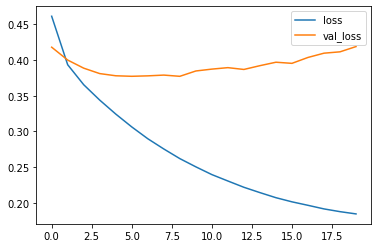

In [20]:
hist_info[['loss','val_loss']].plot()

<AxesSubplot:>

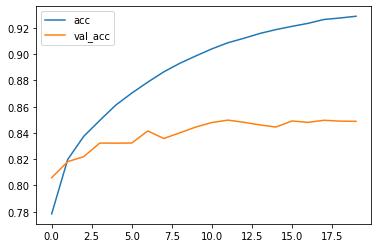

In [21]:
hist_info[['acc','val_acc']].plot()

In [22]:
#model.save('model_nlp_0620_v2.hdf5')

## 進行預測並提交結果

In [23]:
TEST_CSV_PATH = 'C:/Users/Robbie/Documents/bigdata/Final/dataset/test.csv'
test = pd.read_csv(TEST_CSV_PATH, index_col=0)
cols = ['title1_zh', 'title2_zh']
test = test.loc[:, cols]

# 逐筆逐筆轉繁體
test_tw = []
test_tw2 = []
for text in test.title1_zh:
    test_tw.append(cc.convert(text))
for text in test.title2_zh:
    test_tw2.append(cc.convert(text))
test['title1_zh']=test_tw
test['title2_zh']=test_tw2

In [24]:
test_tokens = ws(test.title1_zh)
test_tokens2 = ws(test.title2_zh)

In [25]:
pattern = re.compile(r'[\u4e00-\u9fa5]+')
doc=['(', '⊙o⊙', ')','','好吃',',', '味道', '足','。','2']
[x for x in doc if pattern.match(x)]
tokens_str=[]
drops=[]
for idx,line in enumerate(test_tokens):
    # 刪除不屬於中文字的特殊字元 包含標點符號等
    line_list = [x for x in line if pattern.match(x)]
    line_str = " ".join(line_list) # 合併成字串 以空格分隔
    # 過濾之後，有些留言可能會變成空值 需要進一步刪除該筆
    if len(line_str)==0:
        print(idx, ':skip a blank line跳開這筆空白內容')
        drops.append(idx)
        continue
    tokens_str.append(line_str)  
# drop blank samples去除空白的row
test = test.drop(test.index[ drops ])

In [26]:
pattern = re.compile(r'[\u4e00-\u9fa5]+')
doc=['(', '⊙o⊙', ')','','好吃',',', '味道', '足','。','2']
[x for x in doc if pattern.match(x)]
tokens_str2=[]
drops=[]
for idx,line in enumerate(test_tokens2):
    # 刪除不屬於中文字的特殊字元 包含標點符號等
    line_list = [x for x in line if pattern.match(x)]
    line_str = " ".join(line_list) # 合併成字串 以空格分隔
    # 過濾之後，有些留言可能會變成空值 需要進一步刪除該筆
    if len(line_str)==0:
        print(idx, ':skip a blank line跳開這筆空白內容')
        continue
    tokens_str2.append(line_str)  
# # drop blank samples去除空白的row
# train = train.drop(train.index[ drops ])

In [27]:
test['title1_tokenized'] = tokens_str
# test.drop(test.index[1340], inplace = True)
# test.drop(test.index[227349], inplace = True)
# test.drop(test.index[290503], inplace = True)
test['title2_tokenized'] = tokens_str2

# 將詞彙序列轉為索引數字的序列
x1_test = tokenizer.texts_to_sequences(test.title1_tokenized)
x2_test = tokenizer.texts_to_sequences(test.title2_tokenized)

# 為數字序列加入 zero padding
x1_test = keras.preprocessing.sequence.pad_sequences(x1_test, 
        maxlen=MAX_SEQUENCE_LENGTH)
x2_test = keras.preprocessing.sequence.pad_sequences(x2_test, 
        maxlen=MAX_SEQUENCE_LENGTH)    

# 利用已訓練的模型做預測
predictions = model.predict([x1_test, x2_test])

In [28]:
test

,title1_zh,title2_zh,title1_tokenized,title2_tokenized
id,,,,
321187,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,闢謠！里昂官方否認費基爾加盟利物浦，難道是價格沒談攏？,薩拉赫 人氣 爆棚 埃及 總統 大選 未 參選 獲 百萬 選票 現任 總統 壓力山 大,闢 謠 里昂 官方 否認 費基爾 加盟 利物浦 難道 是 價格 沒 談攏
321190,薩達姆被捕後告誡美國的一句話，發人深思,10大最讓美國人相信的荒誕謠言，如蜥蜴人掌控着美國,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,大 最 讓 美國人 相信 的 荒誕 謠言 如 蜥蜴人 掌控 着 美國
321189,薩達姆此項計劃沒有此國破壞的話，美國還會對伊拉克發動戰爭嗎,薩達姆被捕後告誡美國的一句話，發人深思,薩達姆 此 項 計劃 沒有 此 國 破壞 的話 美國 還 會 對 伊拉克 發動 戰爭 嗎,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思
321193,薩達姆被捕後告誡美國的一句話，發人深思,被絞刑處死的薩達姆是替身？他的此男人舉動擊破替身謠言！,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,被 絞刑 處死 的 薩達姆 是 替身 他 的 此 男人 舉動 擊破 替身 謠言
321191,薩達姆被捕後告誡美國的一句話，發人深思,中國川貝枇杷膏在美國受到熱捧？純屬謠言！,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,中國 川貝 枇杷膏 在 美國 受到 熱捧 純屬 謠言
...,...,...,...,...
322187,董潔和陳坤終於“結婚”了！引來萬衆矚目，不知道潘粵明怎麼想！,陳坤董潔結婚，劉亦菲身穿婚紗鬧場,董潔 和 陳坤 終於 結婚 了 引來 萬 衆 矚目 不 知道 潘粵明 怎麼 想,陳坤 董潔 結婚 劉亦菲 身穿 婚紗 鬧場
322188,董潔和陳坤終於“結婚”了？！引來萬衆矚目：潘粵明在哪裏？,"董潔和陳坤終於“結婚”了!引來萬衆矚目,不知道潘粵明怎麼想!",董潔 和 陳坤 終於 結婚 了 引來 萬衆 矚目 潘粵明 在 哪裏,董潔 和 陳坤 終於 結婚 了 引來 萬 衆 矚目 不 知道 潘粵明 怎麼 想
322191,董潔和陳坤終於“結婚”了？！引來萬衆矚目：潘粵明在哪裏？,董潔和陳坤要“結婚”了！潘粵明你怎麼看？,董潔 和 陳坤 終於 結婚 了 引來 萬衆 矚目 潘粵明 在 哪裏,董潔 和 陳坤 要 結婚 了 潘粵明 你 怎麼 看


In [29]:
predictions[:5]

array([[9.8796552e-01, 4.5685056e-08, 1.2034398e-02],
       [9.9336088e-01, 4.3848323e-04, 6.2005557e-03],
       [9.8986524e-01, 1.0102899e-02, 3.1879987e-05],
       [9.9636960e-01, 2.6402774e-03, 9.9013047e-04],
       [9.9706274e-01, 1.0006562e-05, 2.9272158e-03]], dtype=float32)

In [30]:
index_to_label = {v: k for k, v in label_to_index.items()}

test['Category'] = [index_to_label[idx] for idx in np.argmax(predictions, axis=1)]

submission = test \
    .loc[:, ['Category']] \
    .reset_index()

submission.columns = ['Id', 'Category']
submission.head()

,Id,Category
0,321187,unrelated
1,321190,unrelated
2,321189,unrelated
3,321193,unrelated
4,321191,unrelated


In [31]:
test

,title1_zh,title2_zh,title1_tokenized,title2_tokenized,Category
id,,,,,
321187,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,闢謠！里昂官方否認費基爾加盟利物浦，難道是價格沒談攏？,薩拉赫 人氣 爆棚 埃及 總統 大選 未 參選 獲 百萬 選票 現任 總統 壓力山 大,闢 謠 里昂 官方 否認 費基爾 加盟 利物浦 難道 是 價格 沒 談攏,unrelated
321190,薩達姆被捕後告誡美國的一句話，發人深思,10大最讓美國人相信的荒誕謠言，如蜥蜴人掌控着美國,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,大 最 讓 美國人 相信 的 荒誕 謠言 如 蜥蜴人 掌控 着 美國,unrelated
321189,薩達姆此項計劃沒有此國破壞的話，美國還會對伊拉克發動戰爭嗎,薩達姆被捕後告誡美國的一句話，發人深思,薩達姆 此 項 計劃 沒有 此 國 破壞 的話 美國 還 會 對 伊拉克 發動 戰爭 嗎,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,unrelated
321193,薩達姆被捕後告誡美國的一句話，發人深思,被絞刑處死的薩達姆是替身？他的此男人舉動擊破替身謠言！,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,被 絞刑 處死 的 薩達姆 是 替身 他 的 此 男人 舉動 擊破 替身 謠言,unrelated
321191,薩達姆被捕後告誡美國的一句話，發人深思,中國川貝枇杷膏在美國受到熱捧？純屬謠言！,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,中國 川貝 枇杷膏 在 美國 受到 熱捧 純屬 謠言,unrelated
...,...,...,...,...,...
322187,董潔和陳坤終於“結婚”了！引來萬衆矚目，不知道潘粵明怎麼想！,陳坤董潔結婚，劉亦菲身穿婚紗鬧場,董潔 和 陳坤 終於 結婚 了 引來 萬 衆 矚目 不 知道 潘粵明 怎麼 想,陳坤 董潔 結婚 劉亦菲 身穿 婚紗 鬧場,unrelated
322188,董潔和陳坤終於“結婚”了？！引來萬衆矚目：潘粵明在哪裏？,"董潔和陳坤終於“結婚”了!引來萬衆矚目,不知道潘粵明怎麼想!",董潔 和 陳坤 終於 結婚 了 引來 萬衆 矚目 潘粵明 在 哪裏,董潔 和 陳坤 終於 結婚 了 引來 萬 衆 矚目 不 知道 潘粵明 怎麼 想,unrelated
322191,董潔和陳坤終於“結婚”了？！引來萬衆矚目：潘粵明在哪裏？,董潔和陳坤要“結婚”了！潘粵明你怎麼看？,董潔 和 陳坤 終於 結婚 了 引來 萬衆 矚目 潘粵明 在 哪裏,董潔 和 陳坤 要 結婚 了 潘粵明 你 怎麼 看,unrelated


In [32]:
test.to_csv('nlp_processes.csv', sep='|', index=None)

In [35]:
cols = ['title1_zh','title2_zh', 'title1_tokenized', 'title2_tokenized']
test = test.loc[:, cols]

In [36]:
test

,title1_zh,title2_zh,title1_tokenized,title2_tokenized
id,,,,
321187,薩拉赫人氣爆棚!埃及總統大選未參選獲百萬選票 現任總統壓力山大,闢謠！里昂官方否認費基爾加盟利物浦，難道是價格沒談攏？,薩拉赫 人氣 爆棚 埃及 總統 大選 未 參選 獲 百萬 選票 現任 總統 壓力山 大,闢 謠 里昂 官方 否認 費基爾 加盟 利物浦 難道 是 價格 沒 談攏
321190,薩達姆被捕後告誡美國的一句話，發人深思,10大最讓美國人相信的荒誕謠言，如蜥蜴人掌控着美國,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,大 最 讓 美國人 相信 的 荒誕 謠言 如 蜥蜴人 掌控 着 美國
321189,薩達姆此項計劃沒有此國破壞的話，美國還會對伊拉克發動戰爭嗎,薩達姆被捕後告誡美國的一句話，發人深思,薩達姆 此 項 計劃 沒有 此 國 破壞 的話 美國 還 會 對 伊拉克 發動 戰爭 嗎,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思
321193,薩達姆被捕後告誡美國的一句話，發人深思,被絞刑處死的薩達姆是替身？他的此男人舉動擊破替身謠言！,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,被 絞刑 處死 的 薩達姆 是 替身 他 的 此 男人 舉動 擊破 替身 謠言
321191,薩達姆被捕後告誡美國的一句話，發人深思,中國川貝枇杷膏在美國受到熱捧？純屬謠言！,薩達姆 被 捕 後 告誡 美國 的 一 句 話 發 人 深思,中國 川貝 枇杷膏 在 美國 受到 熱捧 純屬 謠言
...,...,...,...,...
322187,董潔和陳坤終於“結婚”了！引來萬衆矚目，不知道潘粵明怎麼想！,陳坤董潔結婚，劉亦菲身穿婚紗鬧場,董潔 和 陳坤 終於 結婚 了 引來 萬 衆 矚目 不 知道 潘粵明 怎麼 想,陳坤 董潔 結婚 劉亦菲 身穿 婚紗 鬧場
322188,董潔和陳坤終於“結婚”了？！引來萬衆矚目：潘粵明在哪裏？,"董潔和陳坤終於“結婚”了!引來萬衆矚目,不知道潘粵明怎麼想!",董潔 和 陳坤 終於 結婚 了 引來 萬衆 矚目 潘粵明 在 哪裏,董潔 和 陳坤 終於 結婚 了 引來 萬 衆 矚目 不 知道 潘粵明 怎麼 想
322191,董潔和陳坤終於“結婚”了？！引來萬衆矚目：潘粵明在哪裏？,董潔和陳坤要“結婚”了！潘粵明你怎麼看？,董潔 和 陳坤 終於 結婚 了 引來 萬衆 矚目 潘粵明 在 哪裏,董潔 和 陳坤 要 結婚 了 潘粵明 你 怎麼 看


In [ ]:
train.to_csv('train_processes.csv', sep='|', index=None)

## Reference

https://leemeng.tw/shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone.html#%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86%EF%BC%9A%E8%AE%93%E6%A9%9F%E5%99%A8%E8%83%BD%E5%A4%A0%E8%99%95%E7%90%86%E6%96%87%E5%AD%97

What is CNN RNN LSTM
https://kknews.cc/zh-tw/code/xgqerq8.html